# **Building deep learning models with Keras**
---
We'll use the Keras library to build deep learning models. We will know how to solve binary, multi-class, and multi-label problems with neural networks. All of this by solving problems like detecting fake dollar bills, deciding who threw which dart at a board, and building an intelligent system to water your farm. We will also be able to plot model training metrics and to stop training and save our models when they no longer improve.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

---
## Exploring dollar bills
--- 

In [2]:
banknotes = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp_Notes/16_Introduction-to-Deep-Learning-with-Keras/Datasets/banknotes.csv')
banknotes.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


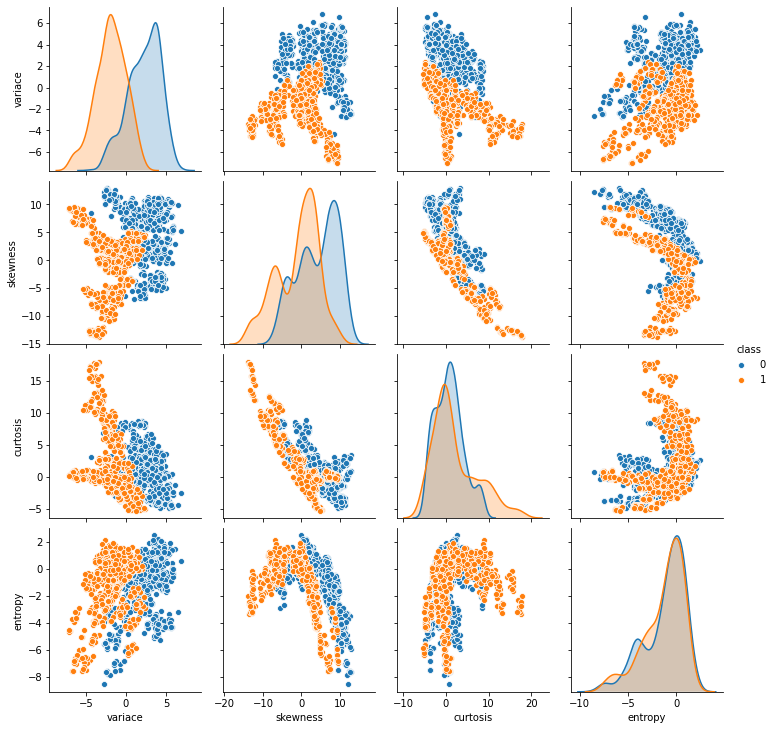

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [3]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts())

---
## A binary classification model
---

In [4]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [5]:
banknotes.head(5)

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
X = banknotes.drop(['class'], axis = 1).to_numpy()
y = banknotes['class']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 111)

In [8]:
print(type(X_train))

<class 'numpy.ndarray'>


In [9]:
print(X_train.shape)
print(X_test.shape)

(960, 4)
(412, 4)


In [10]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

Epoch 1/20
960/960 [==============================] - 0s 246us/step - loss: 3.9443 - accuracy: 0.2479
Epoch 2/20
960/960 [==============================] - 0s 32us/step - loss: 0.9002 - accuracy: 0.4667
Epoch 3/20
960/960 [==============================] - 0s 30us/step - loss: 0.5207 - accuracy: 0.7219
Epoch 4/20
960/960 [==============================] - 0s 31us/step - loss: 0.3888 - accuracy: 0.8208
Epoch 5/20
960/960 [==============================] - 0s 30us/step - loss: 0.3187 - accuracy: 0.8667
Epoch 6/20
960/960 [==============================] - 0s 31us/step - loss: 0.2765 - accuracy: 0.8917
Epoch 7/20
960/960 [==============================] - 0s 40us/step - loss: 0.2483 - accuracy: 0.9115
Epoch 8/20
960/960 [==============================] - 0s 31us/step - loss: 0.2283 - accuracy: 0.9250
Epoch 9/20
960/960 [==============================] - 0s 32us/step - loss: 0.2129 - accuracy: 0.9260
Epoch 10/20
960/960 [==============================] - 0s 31us/step - loss: 0.2007 - accur

---
## A multi-class model
---


In [0]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [13]:
darts = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp_Notes/16_Introduction-to-Deep-Learning-with-Keras/Datasets/darts.csv')
darts.describe()

,xCoord,yCoord
count,800.000000,800.000000
mean,0.005943,0.022868
std,0.475971,0.514482
min,-0.991140,-0.993547
25%,-0.295314,-0.423079
50%,0.000619,0.034483
75%,0.273953,0.452204
max,0.984816,0.994344


In [14]:
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [15]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels
coordinates = darts.drop(['competitor'], axis=1)
competitors = to_categorical(darts.competitor)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [0]:
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates, competitors, 
                                                                               train_size = 0.8, 
                                                                               random_state = 111)

In [17]:
print(competitors_train.shape)

(640, 4)


In [18]:
# Train your model on the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
640/640 [==============================] - 0s 229us/step - loss: 1.3639 - accuracy: 0.2937
Epoch 2/200
640/640 [==============================] - 0s 42us/step - loss: 1.3048 - accuracy: 0.3766
Epoch 3/200
640/640 [==============================] - 0s 45us/step - loss: 1.2371 - accuracy: 0.4281
Epoch 4/200
640/640 [==============================] - 0s 45us/step - loss: 1.1602 - accuracy: 0.5484
Epoch 5/200
640/640 [==============================] - 0s 44us/step - loss: 1.0786 - accuracy: 0.5484
Epoch 6/200
640/640 [==============================] - 0s 44us/step - loss: 0.9864 - accuracy: 0.6062
Epoch 7/200
640/640 [==============================] - 0s 43us/step - loss: 0.9209 - accuracy: 0.6016
Epoch 8/200
640/640 [==============================] - 0s 44us/step - loss: 0.8758 - accuracy: 0.6484
Epoch 9/200
640/640 [==============================] - 0s 43us/step - loss: 0.8411 - accuracy: 0.6547
Epoch 10/200
640/640 [==============================] - 0s 44us/step - loss: 0.81

---
## Preparing a model for tuning
---

In [0]:
# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='relu'):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr=learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape=(30,), activation=activation))
  	model.add(Dense(256, activation=activation))
  	model.add(Dense(1, activation='sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  	return model

In [0]:
# Import KerasClassifier from keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))